This is formatting and aligning data from Copernicus EMS data: https://rapidmapping.emergency.copernicus.eu/

In [30]:
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import yaml
from rasterio.crs import CRS
import pandas as pd

In [31]:
yaml_file = '../events/southwest_france_flood_2023.yml' #'porto_algre.yml'
with open(yaml_file) as f:
    event_dict = yaml.safe_load(f)["event"]
event_dict

{'event_name': 'southwest_france_flood_2023',
 'bounds': [-71.53071089, -33.20143816, -71.2964628, -32.98270579],
 'event_date': '2024-12-14',
 'pre_event_window_days': 100,
 'post_event_window_days': 60,
 'rtc_track_numbers': [18, 156],
 'mgrs_tiles': ['19HBD'],
 'source_id': 'EMSR711 AOI01 DEL Product v2',
 'dist_hls_confirmed_change_min_days': 30,
 'links': ['https://rapidmapping.emergency.copernicus.eu/EMSR711/download',
  'https://news.sky.com/video/france-floods-cities-hit-by-severe-flooding-as-storm-fergus-brings-heavy-rains-and-strong-winds-13029666',
  'https://rapidmapping.emergency.copernicus.eu/EMSR711/reporting']}

In [33]:
df_event = gpd.read_file('../external_validation_data/copernicus_ems/southwest_flood_2023/EMSR711_products/EMSR711_AOI01_DEL_PRODUCT_v2/EMSR711_AOI01_DEL_PRODUCT_observedEventA_v1.shp')
df_event.head()

,event_type,obj_desc,det_method,notation,dmg_src_id,area,geometry
0,5-Flood,Riverine flood,Semi-automatic extraction,Flooded area,3,0.062546,"POLYGON ((-1.03237 45.97560, -1.03237 45.97556..."
1,5-Flood,Riverine flood,Semi-automatic extraction,Flooded area,3,0.062562,"POLYGON ((-1.01193 45.96222, -1.01193 45.96217..."
2,5-Flood,Riverine flood,Semi-automatic extraction,Flooded area,3,0.062562,"POLYGON ((-1.04436 45.96087, -1.04436 45.96083..."
3,5-Flood,Riverine flood,Semi-automatic extraction,Flooded area,3,0.062581,"POLYGON ((-0.95260 45.93159, -0.95260 45.93154..."
4,5-Flood,Riverine flood,Semi-automatic extraction,Flooded area,3,0.062582,"POLYGON ((-0.87296 45.94857, -0.87296 45.94848..."


<Axes: >

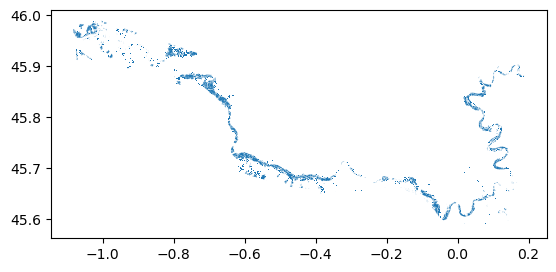

In [34]:
df_event.plot()

In [35]:
df_event.total_bounds

array([-1.0829827 , 45.58218716,  0.18731994, 45.98927041])

In [36]:
geo = df_event.geometry.unary_union

df_event_f = gpd.GeoDataFrame({'name': [event_dict['event_name']],
                               'date': [pd.to_datetime(event_dict['event_date'])],
                               'source_id': [f'Copernicus {event_dict["source_id"]}']},
                              geometry=[geo],
                              crs=CRS.from_epsg(4326))
df_event_f.head()

,name,date,source_id,geometry
0,southwest_france_flood_2023,2024-12-14,Copernicus EMSR711 AOI01 DEL Product v2,"MULTIPOLYGON (((-1.02765 45.90931, -1.02770 45..."


In [37]:
EXTERNAL_VAL_DATA_DIR = Path('../external_validation_data_db/')
EXTERNAL_VAL_DATA_DIR.mkdir(exist_ok=True, parents=True)

In [38]:
df_event_f.to_file(EXTERNAL_VAL_DATA_DIR / f'{event_dict["event_name"]}.geojson', driver='GeoJSON')

# Extent

In [39]:
df_aoi = gpd.read_file('../external_validation_data/copernicus_ems/southwest_flood_2023/EMSR711_products/EMSR711_AOI01_DEL_PRODUCT_v2/EMSR711_AOI01_DEL_PRODUCT_areaOfInterestA_v1.shp')
df_aoi.head()

,emsr_id,glide_no,area_id,locality,map_type,geometry
0,EMSR711,Not Applicable,01,Rochefort,Delineation,"POLYGON ((-0.39454 45.70738, -0.38919 45.70612..."


<Axes: >

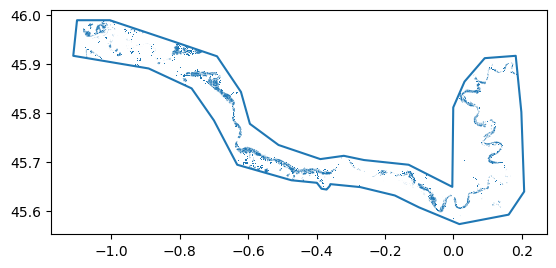

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df_aoi.boundary.plot(ax=ax)
df_event.plot(ax=ax)

In [41]:
EXTERNAL_VAL_EXTENTS = Path('../external_validation_data_extents_db/')
EXTERNAL_VAL_EXTENTS.mkdir(exist_ok=True, parents=True)

df_aoi.to_file(EXTERNAL_VAL_EXTENTS / f'{event_dict["event_name"]}.geojson', driver='GeoJSON')